<a href="https://colab.research.google.com/github/1heodora-e/biometric-recommendation-system/blob/main/image_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install gdown


In [10]:
!pip install -U gdown

In [11]:
import gdown

# Folder link
url = "https://drive.google.com/drive/folders/1mJcxT1eC1wrIC5dCpXMPKBEidGRCBA82"

# The '--folder' flag lets gdown handle folders
!gdown --folder {url} --output ./images

Retrieving folder contents
Processing file 1uf0AiizCYiN6KcHQMNXmldK4YGqx6o_M Caline_neutral.jpeg
Processing file 1D3DpzTqVvSVyQknPkC3emfV1CkhbyoIe Caline_smiling.jpeg
Processing file 1xU3-JVcKTo6zIDYndY0i-AiejvmStZCp Caline_suprised.jpeg
Processing file 1thPUE4FAO0FFlG4_ncWggcZ7oWdPJQBw Keza_neutral.jpg
Processing file 10yREq0jxCuIH4aB8BsKKqgDvdajqNkK6 Keza_smile.jpg
Processing file 1DecvxK4i9Ewt2-4xLYmsirwKIb8WurZi Keza_Surprised.jpg
Processing file 1w8QGXhzCPxfk8z4G5F1KJ8C21l5XURUY SengaKabare_face_neutral.jpg
Processing file 13J5h1Lx9QVRdJn1_GWa4nYGxu7Az4aIr SengaKabare_face_smile.jpg
Processing file 1QtWtdX5oyjPHoZmE1t1DAk1jeDOdTImT SengaKabare_face_suprised.jpg
Processing file 1jo__EMXGihBMBouOIGntProX0Cnoj0bL Theodora_Face_Neutral.DNG
Processing file 1aPY2osLAKsGD668Kk1tqUpjZ5z55vAAH Theodora_Face_Smiling.DNG
Processing file 1AqlGUps2dUTAG4pYifr48NpAFPe-nmaE Theodora_Face_Suprised.DNG
Retrieving folder contents completed
Building directory structure
Building directory structure c

In [12]:
import os
import pandas as pd

# 2. Define the path to the images directory
images_dir = '/content/images'

# 3. Get a list of all filenames in the specified directory
# Make sure to filter for actual files and not directories
all_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

# 4. Initialize an empty list to store dictionaries
image_data = []

# 5. Iterate through each filename
for filename in all_files:
    # Construct the full image path
    full_path = os.path.join(images_dir, filename)

    # a. Extract the base name of the file (without the extension)
    base_name = os.path.splitext(filename)[0]

    # b. Split the base name to identify the 'person' and 'expression'
    # Handle cases like 'SengaKabare_face_neutral.jpg' where 'SengaKabare_face' is the person
    parts = base_name.split('_')
    if len(parts) > 1:
        person = '_'.join(parts[:-1])  # All parts except the last one
        expression = parts[-1]        # The last part
    else:
        person = base_name # If no underscore, treat the whole name as person
        expression = 'unknown' # Or some default for expression

    # c. Create a dictionary for each image
    image_info = {
        'image_path': full_path,
        'person': person,
        'expression': expression
    }
    # d. Append this dictionary to the list
    image_data.append(image_info)

# 6. Convert the list of dictionaries into a pandas DataFrame
df_images = pd.DataFrame(image_data)

# 7. Display the first few rows of the created DataFrame
print("DataFrame created successfully with extracted image information:")
print(df_images.head())

print(f"Total images processed: {len(df_images)}")

DataFrame created successfully with extracted image information:
                                      image_path            person expression
0      /content/images/Theodora_Face_Smiling.DNG     Theodora_Face    Smiling
1               /content/images/Keza_neutral.jpg              Keza    neutral
2  /content/images/SengaKabare_face_suprised.jpg  SengaKabare_face   suprised
3             /content/images/Keza_Surprised.jpg              Keza  Surprised
4     /content/images/SengaKabare_face_smile.jpg  SengaKabare_face      smile
Total images processed: 12


In [13]:
import matplotlib.pyplot as plt
from PIL import Image

# Get unique persons from the DataFrame
unique_persons = df_images['person'].unique()

# Define the expressions we are looking for
expressions_to_show = ['neutral', 'smiling', 'surprised', 'Neutral', 'Smiling', 'Surprised', 'smile', 'suprised', 'Smile', 'Suprised']

# Dictionary to store selected images for plotting
selected_images = {}

for person in unique_persons:
    selected_images[person] = {}
    for exp in expressions_to_show:
        # Filter for the current person and expression, case-insensitively
        filtered_df = df_images[(df_images['person'] == person) &
                                (df_images['expression'].str.lower() == exp.lower())]

        # If an image for the expression is found, take the first one
        if not filtered_df.empty:
            selected_images[person][exp.lower()] = filtered_df.iloc[0]['image_path']

# Define a consistent order for expressions for plotting columns
plot_expressions_order = ['neutral', 'smiling', 'surprised']

# Filter out persons who don't have at least one of the main expressions
persons_for_plot = [p for p, exps in selected_images.items() if any(e in exps for e in plot_expressions_order)]

# Determine the number of rows and columns for the subplot grid
num_rows = len(persons_for_plot)
num_cols = len(plot_expressions_order)

print(f"Selected images for plotting: {selected_images}")
print(f"Number of persons to plot: {num_rows}")
print(f"Number of expressions per person: {num_cols}")

Selected images for plotting: {'Theodora_Face': {'neutral': '/content/images/Theodora_Face_Neutral.DNG', 'smiling': '/content/images/Theodora_Face_Smiling.DNG', 'suprised': '/content/images/Theodora_Face_Suprised.DNG'}, 'Keza': {'neutral': '/content/images/Keza_neutral.jpg', 'surprised': '/content/images/Keza_Surprised.jpg', 'smile': '/content/images/Keza_smile.jpg'}, 'SengaKabare_face': {'neutral': '/content/images/SengaKabare_face_neutral.jpg', 'smile': '/content/images/SengaKabare_face_smile.jpg', 'suprised': '/content/images/SengaKabare_face_suprised.jpg'}, 'Caline': {'neutral': '/content/images/Caline_neutral.jpeg', 'smiling': '/content/images/Caline_smiling.jpeg', 'suprised': '/content/images/Caline_suprised.jpeg'}}
Number of persons to plot: 4
Number of expressions per person: 3


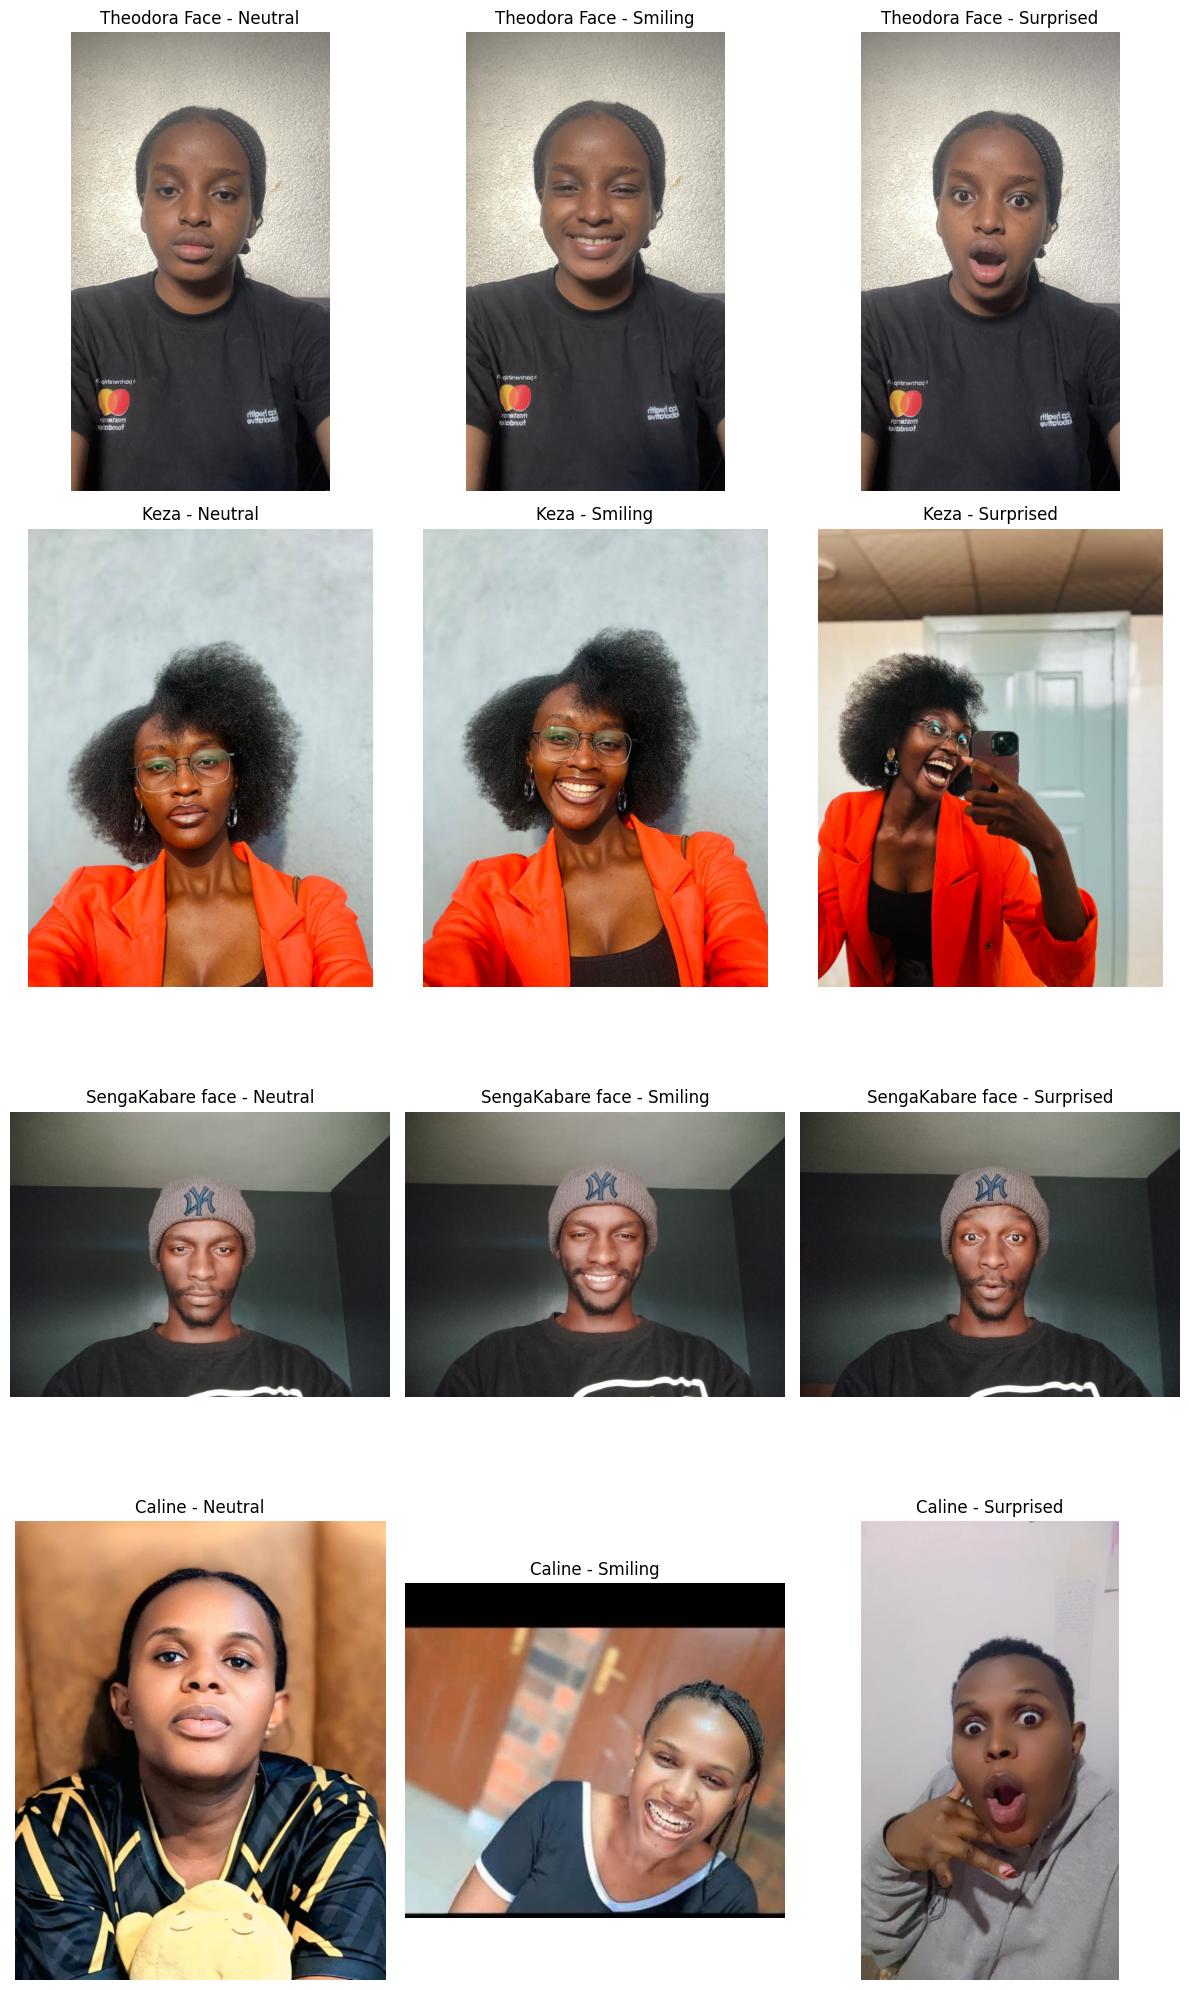

In [14]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 5))

# Handle case where there's only one row or one column for proper indexing
if num_rows == 1 and num_cols == 1:
    axes = [[axes]]
elif num_rows == 1:
    axes = [axes] # Make it a list of arrays for consistent indexing
elif num_cols == 1:
    axes = [[ax] for ax in axes] # Make it a list of lists for consistent indexing

for i, person in enumerate(persons_for_plot):
    for j, expression in enumerate(plot_expressions_order):
        ax = axes[i][j]

        # Check if an image exists for this person and expression
        # Need to handle the varied naming of expressions (e.g., 'smile' vs 'smiling', 'suprised' vs 'surprised')
        image_path = None
        for exp_key in selected_images[person]:
            if exp_key == expression or (expression == 'smiling' and exp_key == 'smile') or \
               (expression == 'surprised' and exp_key == 'suprised'):
                image_path = selected_images[person][exp_key]
                break

        if image_path:
            try:
                img = Image.open(image_path)
                ax.imshow(img)
                ax.set_title(f"{person.replace('_', ' ')} - {expression.capitalize()}")
                ax.axis('off')
            except Exception as e:
                ax.set_title(f"Error loading {person} - {expression}: {e}")
                ax.axis('off')
        else:
            ax.set_title(f"{person.replace('_', ' ')} - {expression} (N/A)")
            ax.axis('off')

plt.tight_layout()
plt.show()

In [15]:
import os
from PIL import Image
import pandas as pd

# 1. Create a new directory named /content/augmented_images
augmented_images_dir = '/content/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

# 2. Define image augmentation functions
def rotate_image(image, angle):
    return image.rotate(angle, expand=True)

def flip_image(image):
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def grayscale_image(image):
    return image.convert('L')

print(f"Created directory: {augmented_images_dir}")
print("Defined augmentation functions: rotate_image, flip_image, grayscale_image")

Created directory: /content/augmented_images
Defined augmentation functions: rotate_image, flip_image, grayscale_image


In [16]:
augmented_image_data = []

# Iterate through each original image in df_images
for index, row in df_images.iterrows():
    original_image_path = row['image_path']
    person = row['person']
    expression = row['expression']

    try:
        # Load the original image
        original_image = Image.open(original_image_path)

        # Extract original filename for constructing new filenames
        original_filename_base = os.path.splitext(os.path.basename(original_image_path))[0]
        original_file_extension = os.path.splitext(os.path.basename(original_image_path))[1]

        # Apply Rotation (e.g., 90 degrees)
        rotated_image = rotate_image(original_image, 90)
        rotated_filename = f"{original_filename_base}_rotated{original_file_extension}"
        rotated_path = os.path.join(augmented_images_dir, rotated_filename)
        # Ensure the image is in a saveable format (e.g., RGB for JPEGs, or convert to PNG if DNG)
        if original_file_extension.lower() in ['.dng'] and rotated_image.mode != 'RGB':
            rotated_image = rotated_image.convert('RGB')
        rotated_image.save(rotated_path)
        augmented_image_data.append({
            'image_path': rotated_path,
            'person': person,
            'expression': expression,
            'augmentation': 'rotated'
        })

        # Apply Horizontal Flip
        flipped_image = flip_image(original_image)
        flipped_filename = f"{original_filename_base}_flipped{original_file_extension}"
        flipped_path = os.path.join(augmented_images_dir, flipped_filename)
        if original_file_extension.lower() in ['.dng'] and flipped_image.mode != 'RGB':
            flipped_image = flipped_image.convert('RGB')
        flipped_image.save(flipped_path)
        augmented_image_data.append({
            'image_path': flipped_path,
            'person': person,
            'expression': expression,
            'augmentation': 'flipped'
        })

        # Apply Grayscale Conversion
        # Check if the image is already grayscale (mode 'L' or 'LA') before converting
        if original_image.mode not in ('L', 'LA'):
            grayscale_img = grayscale_image(original_image)
            grayscale_filename = f"{original_filename_base}_grayscale.png" # Grayscale often saved as PNG
            grayscale_path = os.path.join(augmented_images_dir, grayscale_filename)
            grayscale_img.save(grayscale_path)
            augmented_image_data.append({
                'image_path': grayscale_path,
                'person': person,
                'expression': expression,
                'augmentation': 'grayscale'
            })

    except Exception as e:
        print(f"Error processing image {original_image_path}: {e}")

# Convert the list of dictionaries into a new pandas DataFrame for augmented images
df_augmented_images = pd.DataFrame(augmented_image_data)

print("Augmentation process completed.")
print("First 5 rows of df_augmented_images:")
print(df_augmented_images.head())
print(f"Total augmented images: {len(df_augmented_images)}")

Error processing image /content/images/Theodora_Face_Smiling.DNG: unknown file extension: .dng
Error processing image /content/images/Theodora_Face_Neutral.DNG: unknown file extension: .dng
Error processing image /content/images/Theodora_Face_Suprised.DNG: unknown file extension: .dng
Augmentation process completed.
First 5 rows of df_augmented_images:
                                          image_path            person  \
0  /content/augmented_images/Keza_neutral_rotated...              Keza   
1  /content/augmented_images/Keza_neutral_flipped...              Keza   
2  /content/augmented_images/Keza_neutral_graysca...              Keza   
3  /content/augmented_images/SengaKabare_face_sup...  SengaKabare_face   
4  /content/augmented_images/SengaKabare_face_sup...  SengaKabare_face   

  expression augmentation  
0    neutral      rotated  
1    neutral      flipped  
2    neutral    grayscale  
3   suprised      rotated  
4   suprised      flipped  
Total augmented images: 27


**Reasoning**:
The previous step successfully created augmented images and their metadata in `df_augmented_images`. Now, I will add a 'type' column to both `df_images` and `df_augmented_images` to distinguish original from augmented data, and then concatenate them into a single DataFrame `df_all_images` as per the instructions. Finally, I will display the head and shape of the combined DataFrame to verify the results.



In [17]:
df_images['type'] = 'original'
df_augmented_images['type'] = 'augmented'

# Concatenate df_images and df_augmented_images into a single DataFrame
df_all_images = pd.concat([df_images, df_augmented_images], ignore_index=True)

print("Combined DataFrame (df_all_images) head:")
print(df_all_images.head())
print(f"\nShape of df_all_images: {df_all_images.shape}")

Combined DataFrame (df_all_images) head:
                                      image_path            person expression  \
0      /content/images/Theodora_Face_Smiling.DNG     Theodora_Face    Smiling   
1               /content/images/Keza_neutral.jpg              Keza    neutral   
2  /content/images/SengaKabare_face_suprised.jpg  SengaKabare_face   suprised   
3             /content/images/Keza_Surprised.jpg              Keza  Surprised   
4     /content/images/SengaKabare_face_smile.jpg  SengaKabare_face      smile   

       type augmentation  
0  original          NaN  
1  original          NaN  
2  original          NaN  
3  original          NaN  
4  original          NaN  

Shape of df_all_images: (39, 5)


## Extract Features from Images

### Subtask:
Use a pre-trained deep learning model (e.g., VGG16) to extract embeddings from both the original and augmented images. Additionally, compute color histograms (e.g., RGB histograms) for all images (original and augmented).


In [18]:
import numpy as np
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 2. Load the pre-trained VGG16 model without the top classification layer
model = VGG16(weights='imagenet', include_top=False)
print("VGG16 model loaded successfully.")

# 3. Define a function, extract_vgg_features
def extract_vgg_features(image_path):
    try:
        # Resize images to 224x224 for VGG16
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
        img_array = preprocess_input(img_array) # Preprocess for VGG16
        features = model.predict(img_array)
        return features.flatten() # Flatten the features for easier storage
    except Exception as e:
        print(f"Error extracting VGG16 features from {image_path}: {e}")
        return None

# 4. Define a function, extract_color_histogram
def extract_color_histogram(image_path, bins=8):
    try:
        # Load the image using OpenCV
        img = cv2.imread(image_path)
        if img is None:
            # Try PIL for DNG files, then convert to OpenCV format
            pil_img = Image.open(image_path)
            img = np.array(pil_img)
            if len(img.shape) == 2: # Grayscale image
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            elif img.shape[2] == 4: # RGBA image
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Convert to RGB if not already (OpenCV loads as BGR by default)
        if len(img.shape) == 3 and img.shape[2] == 3:
            # Image is already BGR, so convert to RGB for consistency or keep BGR
            # For histogram calculation, BGR is fine, but often people think RGB.
            # Let's keep it BGR as cv2.calcHist expects BGR channels by default
            pass
        else:
            # Handle grayscale images if any - convert to BGR first
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

        # Define ranges for R, G, B channels
        ranges = [0, 256, 0, 256, 0, 256]

        # Compute the 3D histogram
        hist = cv2.calcHist([img], [0, 1, 2], None, [bins, bins, bins], ranges)
        return hist.flatten() # Flatten the histogram for storage
    except Exception as e:
        print(f"Error extracting color histogram from {image_path}: {e}")
        return None

# 5. Initialize empty lists
vgg_features_list = []
histograms_list = []

# 6. Iterate through each row of the df_all_images DataFrame
for index, row in df_all_images.iterrows():
    image_path = row['image_path']

    # 7. Call extract_vgg_features and extract_color_histogram
    vgg_features = extract_vgg_features(image_path)
    color_hist = extract_color_histogram(image_path)

    # 8. Append the extracted features to their respective lists
    vgg_features_list.append(vgg_features)
    histograms_list.append(color_hist)

# 9. Add the lists as new columns to df_all_images
df_all_images['vgg_features'] = vgg_features_list
df_all_images['color_histogram'] = histograms_list

print("Feature extraction complete. Displaying the first few rows with new features:")
print(df_all_images.head())

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
VGG16 model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━

In [46]:
import numpy as np

OUTPUT_CSV = 'image_features.csv'

# Convert numpy arrays to lists of numbers before saving
# This ensures they are saved in a format that ast.literal_eval can parse correctly upon reloading.
df_all_images['vgg_features'] = df_all_images['vgg_features'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df_all_images['color_histogram'] = df_all_images['color_histogram'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

# Save the combined DataFrame to a CSV file
df_all_images.to_csv(OUTPUT_CSV, index=False)

print(f"All image features and metadata saved to {OUTPUT_CSV}")

All image features and metadata saved to image_features.csv


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import ast # Import ast for literal_eval

# Load the CSV file again, ensuring features are parsed correctly
df_all_images = pd.read_csv("image_features.csv")

# Convert the string representations of lists back into actual lists/arrays
df_all_images['vgg_features'] = df_all_images['vgg_features'].apply(ast.literal_eval)
df_all_images['color_histogram'] = df_all_images['color_histogram'].apply(ast.literal_eval)

# Combine VGG16 and Color Histogram features
# Ensure no None values remain
df_all_images = df_all_images.dropna(subset=['vgg_features', 'color_histogram']).reset_index(drop=True)

# Convert feature lists into arrays
vgg_features_array = np.array(df_all_images['vgg_features'].tolist())
color_hist_array = np.array(df_all_images['color_histogram'].tolist())

# Concatenate both feature sets into one unified feature vector per image
X = np.hstack((vgg_features_array, color_hist_array))

# Ensure 'label' column exists
# Revisit how 'label' is determined. If 'expression' is the target, use that.
# For now, let's assume 'expression' is the target label as it's extracted earlier.
if 'label' not in df_all_images.columns or df_all_images['label'].isnull().all():
    df_all_images['label'] = df_all_images['expression'] # Using 'expression' as the target label

# Drop rows where 'label' might still be undefined or problematic
df_all_images = df_all_images.dropna(subset=['label']).reset_index(drop=True)

# Now proceed with the classification
y = df_all_images['label']

# Train-test split
# Ensure there are enough samples and labels for stratification
if len(y.unique()) > 1 and len(df_all_images) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
else:
    print("Not enough samples or unique classes to perform stratified train-test split. Skipping training.")
    X_train, X_test, y_train, y_test = X, X, y, y # Assign all to train/test to prevent errors later, but indicate problem

# Only proceed with training if X_train is not empty
if X_train.size > 0:
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a simple classifier (Random Forest)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # Evaluate the model
    y_pred = clf.predict(X_test_scaled)

    print(" Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n Accuracy:", accuracy_score(y_test, y_pred))

    # Add predictions back to DataFrame
    df_all_images['predicted_label'] = clf.predict(scaler.transform(X))
else:
    print("No data to train or evaluate the model.")
    df_all_images['predicted_label'] = None # No predictions if no training


# Save extracted features to CSV (no need to re-convert to string if already lists)
# If we are saving features after training, we might want to overwrite the original one or save a new one.
# For now, let's re-save in case 'predicted_label' was added.
output_path = "image_features.csv"
# Ensure features are saved as lists for future reloading
df_all_images['vgg_features'] = df_all_images['vgg_features'].apply(lambda x: str(x))
df_all_images['color_histogram'] = df_all_images['color_histogram'].apply(lambda x: str(x))
df_all_images.to_csv(output_path, index=False)
print(f"\n Feature file saved successfully as {output_path}")

Not enough samples or unique classes to perform stratified train-test split. Skipping training.
No data to train or evaluate the model.

 Feature file saved successfully as image_features.csv


In [51]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import ast

# --- Rerun image loading and DataFrame creation (from cell 18db35a1) ---
images_dir = '/content/images'
all_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
image_data = []
for filename in all_files:
    full_path = os.path.join(images_dir, filename)
    base_name = os.path.splitext(filename)[0]
    parts = base_name.split('_')
    if len(parts) > 1:
        person = '_'.join(parts[:-1])
        expression = parts[-1]
    else:
        person = base_name
        expression = 'unknown'
    image_info = {
        'image_path': full_path,
        'person': person,
        'expression': expression
    }
    image_data.append(image_info)
df_images = pd.DataFrame(image_data)
print("df_images created successfully.")

# --- Rerun augmentation functions and DataFrame creation (from cell 5a080a42 and e5e25b9a) ---
augmented_images_dir = '/content/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

def rotate_image(image, angle):
    return image.rotate(angle, expand=True)

def flip_image(image):
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def grayscale_image(image):
    return image.convert('L')

augmented_image_data = []
for index, row in df_images.iterrows():
    original_image_path = row['image_path']
    person = row['person']
    expression = row['expression']
    try:
        original_image = Image.open(original_image_path)
        original_filename_base = os.path.splitext(os.path.basename(original_image_path))[0]
        original_file_extension = os.path.splitext(os.path.basename(original_image_path))[1]

        # Determine new extension for augmented files
        new_augmented_extension = '.jpeg' if original_file_extension.lower() == '.dng' else original_file_extension

        # Apply Rotation (e.g., 90 degrees)
        rotated_image = rotate_image(original_image, 90)
        rotated_filename = f"{original_filename_base}_rotated{new_augmented_extension}"
        rotated_path = os.path.join(augmented_images_dir, rotated_filename)
        if original_file_extension.lower() in ['.dng'] and rotated_image.mode != 'RGB':
            rotated_image = rotated_image.convert('RGB')
        rotated_image.save(rotated_path)
        augmented_image_data.append({
            'image_path': rotated_path,
            'person': person,
            'expression': expression,
            'augmentation': 'rotated'
        })

        # Apply Horizontal Flip
        flipped_image = flip_image(original_image)
        flipped_filename = f"{original_filename_base}_flipped{new_augmented_extension}"
        flipped_path = os.path.join(augmented_images_dir, flipped_filename)
        if original_file_extension.lower() in ['.dng'] and flipped_image.mode != 'RGB':
            flipped_image = flipped_image.convert('RGB')
        flipped_image.save(flipped_path)
        augmented_image_data.append({
            'image_path': flipped_path,
            'person': person,
            'expression': expression,
            'augmentation': 'flipped'
        })

        # Apply Grayscale Conversion
        # Grayscale images are explicitly saved as PNG, which is generally safe
        if original_image.mode not in ('L', 'LA'):
            grayscale_img = grayscale_image(original_image)
            grayscale_filename = f"{original_filename_base}_grayscale.png"
            grayscale_path = os.path.join(augmented_images_dir, grayscale_filename)
            grayscale_img.save(grayscale_path)
            augmented_image_data.append({
                'image_path': grayscale_path,
                'person': person,
                'expression': expression,
                'augmentation': 'grayscale'
            })

    except Exception as e:
        print(f"Error processing image {original_image_path}: {e}")

df_augmented_images = pd.DataFrame(augmented_image_data)
print("df_augmented_images created successfully.")

# --- Combine Dataframes (from cell 28b03914) ---
df_images['type'] = 'original'
df_augmented_images['type'] = 'augmented'
df_all_images = pd.concat([df_images, df_augmented_images], ignore_index=True)
print(f"df_all_images created with shape: {df_all_images.shape}")

# --- Extract features (from cell 5d568b51) ---
model = VGG16(weights='imagenet', include_top=False)

def extract_vgg_features(image_path):
    try:
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        features = model.predict(img_array, verbose=0)
        return features.flatten()
    except Exception as e:
        # print(f"Error extracting VGG16 features from {image_path}: {e}")
        return None

def extract_color_histogram(image_path, bins=8):
    try:
        img = cv2.imread(image_path)
        if img is None:
            pil_img = Image.open(image_path)
            img = np.array(pil_img)
            if len(img.shape) == 2:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            elif img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)
            else:
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        if len(img.shape) == 3 and img.shape[2] == 3:
            pass
        else:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        ranges = [0, 256, 0, 256, 0, 256]
        hist = cv2.calcHist([img], [0, 1, 2], None, [bins, bins, bins], ranges)
        return hist.flatten()
    except Exception as e:
        # print(f"Error extracting color histogram from {image_path}: {e}")
        return None

vgg_features_list = []
histograms_list = []

for index, row in df_all_images.iterrows():
    image_path = row['image_path']
    vgg_features = extract_vgg_features(image_path)
    color_hist = extract_color_histogram(image_path)
    vgg_features_list.append(vgg_features)
    histograms_list.append(color_hist)

df_all_images['vgg_features'] = vgg_features_list
df_all_images['color_histogram'] = histograms_list
print("Features extracted and added to df_all_images.")

# --- Save to CSV (modified cell ab68ee08 logic) ---
OUTPUT_CSV = 'image_features.csv'

df_all_images_processed = df_all_images.copy()
# Convert numpy arrays to lists of numbers before saving
df_all_images_processed['vgg_features'] = df_all_images_processed['vgg_features'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
df_all_images_processed['color_histogram'] = df_all_images_processed['color_histogram'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

df_all_images_processed.to_csv(OUTPUT_CSV, index=False)
print(f"All image features and metadata saved to {OUTPUT_CSV}")

# --- Train model (from cell 0e6Ba98vkmwv) ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the CSV file again, ensuring features are parsed correctly
df_all_images_loaded = pd.read_csv("image_features.csv")

# Convert the string representations of lists back into actual lists/arrays
df_all_images_loaded['vgg_features'] = df_all_images_loaded['vgg_features'].apply(ast.literal_eval)
df_all_images_loaded['color_histogram'] = df_all_images_loaded['color_histogram'].apply(ast.literal_eval)

# Combine VGG16 and Color Histogram features
# Ensure no None values remain
df_all_images_loaded = df_all_images_loaded.dropna(subset=['vgg_features', 'color_histogram']).reset_index(drop=True)

# Convert feature lists into arrays
vgg_features_array = np.array(df_all_images_loaded['vgg_features'].tolist())
color_hist_array = np.array(df_all_images_loaded['color_histogram'].tolist())

# Concatenate both feature sets into one unified feature vector per image
X = np.hstack((vgg_features_array, color_hist_array))

# Ensure 'label' column exists
if 'label' not in df_all_images_loaded.columns or df_all_images_loaded['label'].isnull().all():
    df_all_images_loaded['label'] = df_all_images_loaded['expression'] # Using 'expression' as the target label

# Drop rows where 'label' might still be undefined or problematic
df_all_images_loaded = df_all_images_loaded.dropna(subset=['label']).reset_index(drop=True)

# Now proceed with the classification
y = df_all_images_loaded['label']

# Standardize expression labels to handle case variations and synonyms
y = y.str.lower().replace({
    'smiling': 'smile',
    'suprised': 'surprised',
    'surprised': 'surprised', # ensures consistency
    'neutral': 'neutral'      # ensures consistency
})


# Train-test split
if len(y.unique()) > 1 and len(df_all_images_loaded) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a simple classifier (Random Forest)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_scaled, y_train)

    # Evaluate the model
    y_pred = clf.predict(X_test_scaled)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nAccuracy:", accuracy_score(y_test, y_pred))

    # Add predictions back to DataFrame
    df_all_images_loaded['predicted_label'] = clf.predict(scaler.transform(X))
else:
    print("\nNot enough samples or unique classes to perform stratified train-test split. Skipping training.")
    print("No data to train or evaluate the model.")
    df_all_images_loaded['predicted_label'] = None # No predictions if no training


output_path = "image_features.csv"
df_all_images_loaded['vgg_features'] = df_all_images_loaded['vgg_features'].apply(lambda x: str(x))
df_all_images_loaded['color_histogram'] = df_all_images_loaded['color_histogram'].apply(lambda x: str(x))
df_all_images_loaded.to_csv(output_path, index=False)
print(f"\nFeature file saved successfully as {output_path}")

df_images created successfully.
df_augmented_images created successfully.
df_all_images created with shape: (48, 5)
Features extracted and added to df_all_images.
All image features and metadata saved to image_features.csv

Classification Report:
              precision    recall  f1-score   support

     neutral       0.40      0.67      0.50         3
       smile       1.00      0.33      0.50         3
   surprised       0.50      0.50      0.50         4

    accuracy                           0.50        10
   macro avg       0.63      0.50      0.50        10
weighted avg       0.62      0.50      0.50        10


Confusion Matrix:
[[2 0 1]
 [1 1 1]
 [2 0 2]]

Accuracy: 0.5

Feature file saved successfully as image_features.csv


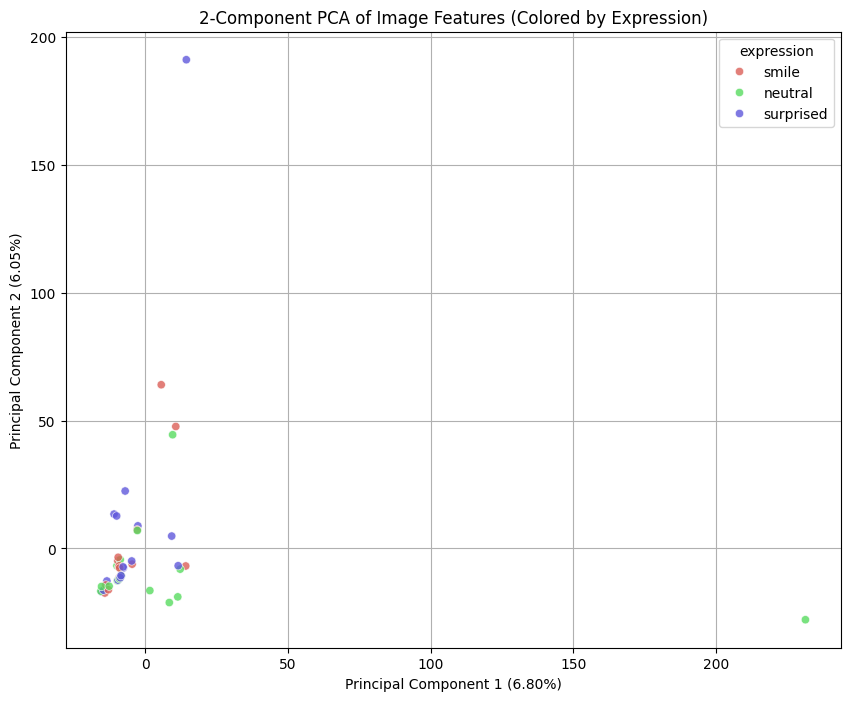

Explained variance ratio by principal components: [0.06799073 0.06045716]


In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming df_all_images_loaded, X, and y are available from previous steps
# If not, ensure they are loaded/processed correctly

# Standardize the full feature set (X) before PCA
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_full)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])
pca_df['expression'] = y

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="expression",
    palette=sns.color_palette("hls", len(y.unique())),
    data=pca_df,
    legend="full",
    alpha=0.8
)
plt.title('2-Component PCA of Image Features (Colored by Expression)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.grid(True)
plt.show()

print(f"Explained variance ratio by principal components: {pca.explained_variance_ratio_}")

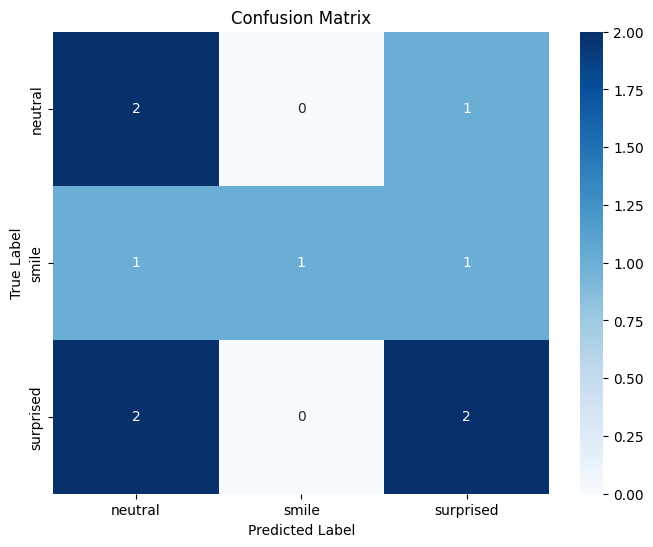

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are available from the classification step

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels for better visualization
class_labels = sorted(y.unique())

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("image_features.csv")

# View the first few rows
print(df.head())

# Or a quick overview
print(df.info())

                                      image_path            person expression  \
0      /content/images/Theodora_Face_Smiling.DNG     Theodora_Face    Smiling   
1               /content/images/Keza_neutral.jpg              Keza    neutral   
2  /content/images/SengaKabare_face_suprised.jpg  SengaKabare_face   suprised   
3             /content/images/Keza_Surprised.jpg              Keza  Surprised   
4     /content/images/SengaKabare_face_smile.jpg  SengaKabare_face      smile   

       type augmentation                                       vgg_features  \
0  original          NaN  [0.0, 0.0, 0.0, 2.0351827144622803, 0.0, 0.0, ...   
1  original          NaN  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  original          NaN  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  original          NaN  [0.0, 0.0, 0.0, 0.0, 2.2019705772399902, 0.0, ...   
4  original          NaN  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                     c